In [1]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
from pandas.tools.plotting import autocorrelation_plot
from scipy.stats import ks_2samp

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
comparison= pd.read_csv('C:/Python27/features_comparison.csv')
full_content = pd.read_csv('C:/Python27/output_improved.csv')
comparison[:2]

,Id,AirbnbAccuracy,AirbnbCheck-in,AirbnbCleanliness,AirbnbCommunication,AirbnbLocation,AirbnbValue,PipeAccuracy,PipeCheckin,PipeCleanliness,PipeCommunication,PipeLocation,PipeValue
0,2016430,4.5,4.5,4.5,4.5,4.5,4.0,NaN,3.5,4.0,3.5,5.0,4.5
1,20168,4.5,4.5,4.5,4.5,5.0,4.5,4.0,4.0,4.0,4.0,4.0,4.0


## Combinations of stars of Airbnb and Pipeline for all features
The graph shows all the possible combinations of feature stars with the Airbnb stars per feature. Each point represents a combination, the strength of the color indicates that the combination is found more often. However these frequencies will be visualized later.

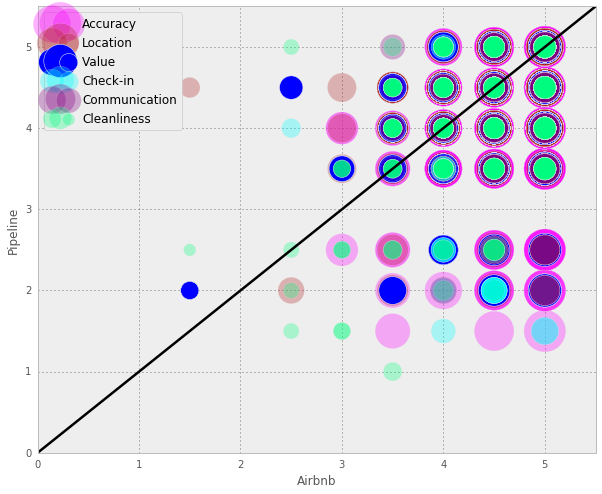

In [3]:
ax = comparison.plot(kind='scatter', x='AirbnbAccuracy', 
y='PipeAccuracy', color='Fuchsia', label='Accuracy',alpha=0.3, s=comparison['AirbnbAccuracy']*350)

bx = comparison.plot(kind='scatter', x='AirbnbLocation',
y='PipeLocation',color='FireBrick', label='Location', ax=ax,alpha=0.3, s=comparison['AirbnbLocation']*280)

cx = comparison.plot(kind='scatter', x='AirbnbValue', y='PipeValue', color='Blue', label='Value', ax=bx,  s=comparison['AirbnbValue']*220)

dx = comparison.plot(kind='scatter', x='AirbnbCheck-in', y='PipeCheckin', color='Aqua', label='Check-in', ax=cx,  s=comparison['AirbnbCheck-in']*150)

ex = comparison.plot(kind='scatter', x='AirbnbCommunication',  y='PipeCommunication', color='Purple', alpha=0.3, label='Communication',
                     ax=dx,  s=comparison['AirbnbCommunication']*180)

fx = comparison.plot(kind='scatter', x='AirbnbCleanliness', y='PipeCleanliness', color='SpringGreen', label='Cleanliness', ax=ex, 
s=comparison['AirbnbCleanliness']*100, alpha=0.3, figsize=(10,8)).set_xlim(0,8)
line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.xlabel('Airbnb')
plt.ylabel('Pipeline')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

## How star assignment for Accuracy are found in combination Airbnb and Pipeline
For every listing it is seen how the Pipeline assigns the value and how the corresponding star in the Airbnb system is. 26 possible combinations are found

In [10]:
# For filling the dataframe
i=5.0
s0=comparison[comparison['AirbnbAccuracy']==i]
s00=s0['PipeAccuracy'].value_counts()
b=pd.DataFrame({'Airbnb':i, 'Pipeline':s00.index,
                'V_Frequency': s00.values})
i=4.5
s1=comparison[comparison['AirbnbAccuracy']==i]
s11=s1['PipeAccuracy'].value_counts()
b1=pd.DataFrame({'Airbnb':i, 'Pipeline':s11.index, 
                 'V_Frequency': s11.values})
i=4.0
s2=comparison[comparison['AirbnbAccuracy']==i]
s22=s2['PipeAccuracy'].value_counts()
b2=pd.DataFrame({'Airbnb':i, 'Pipeline':s22.index,
                 'V_Frequency': s22.values})
i=3.5
s3=comparison[comparison['AirbnbAccuracy']==i]
s33=s3['PipeAccuracy'].value_counts()
b3=pd.DataFrame({'Airbnb':i, 'Pipeline':s33.index, 
                 'V_Frequency': s33.values})
i=3.0
s4=comparison[comparison['AirbnbAccuracy']==i]
s44=s4['PipeAccuracy'].value_counts()
b4=pd.DataFrame({'Airbnb':i, 'Pipeline':s44.index, 
                 'V_Frequency': s44.values})
i=2.5
s5=comparison[comparison['AirbnbAccuracy']==i]
s55=s5['PipeAccuracy'].value_counts()
b5=pd.DataFrame({'Airbnb':i, 'Pipeline':s55.index, 
                 'V_Frequency': s55.values})
stars_compared=pd.concat([b,b1,b2,b3,b4,b5],ignore_index=True)
stars_compared['Percentage']=
((stars_compared['V_Frequency']/stars_compared['V_Frequency'].sum())*100)
stars_compared.columns=['Airbnb','Pipeline','Frequency','Percentage']
stars_compared

,Airbnb,Pipeline,Frequency,Percentage
0,5.0,4.0,545,35.21
1,5.0,4.5,211,13.63
2,5.0,3.5,104,6.72
3,5.0,5.0,23,1.49
4,5.0,2.5,6,0.39
5,5.0,2.0,4,0.26
6,5.0,1.5,1,0.06
7,4.5,4.0,343,22.16
8,4.5,3.5,102,6.59
9,4.5,4.5,94,6.07


## Plot of star combinations only for feature Accuracy

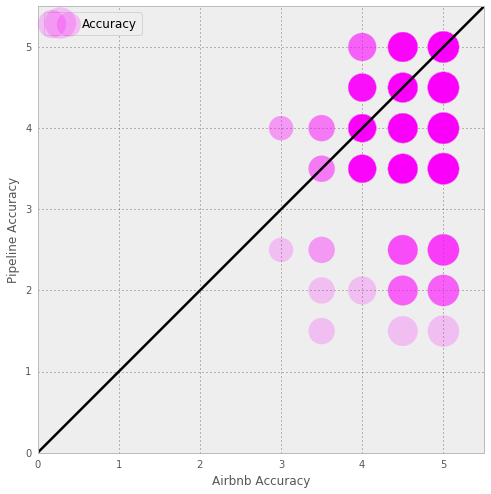

In [11]:
ax = comparison.plot(kind='scatter', x='AirbnbAccuracy', y='PipeAccuracy',
color='Fuchsia', label='Accuracy', s=comparison['AirbnbAccuracy']*200,
                     alpha=0.2, figsize=(8,8))

line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Accuracy')
plt.xlabel('Airbnb Accuracy')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

## Group rare combinations under the category "OTHERS"

In [12]:
ot=stars_compared[stars_compared['Percentage']<5]
other=ot['Percentage'].sum()
other
freq=ot['Frequency'].sum()
main=stars_compared[stars_compared['Percentage']>=5]
main.loc[26]=['Other','Other',freq,other]
main

c:\python27\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Airbnb,Pipeline,Frequency,Percentage
0,5,4,545,35.21
1,5,4.5,211,13.63
2,5,3.5,104,6.72
7,4.5,4,343,22.16
8,4.5,3.5,102,6.59
9,4.5,4.5,94,6.07
26,Other,Other,149,9.60


## Visualization of all the combinations found for Feature: Accuracy

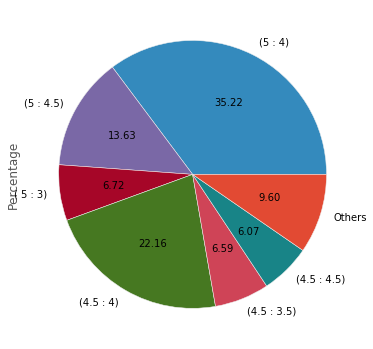

In [13]:
main['Percentage'].plot(kind='pie', labels=['(5 : 4)', '(5 : 4.5)', '( 5 : 3)',
  '(4.5 : 4)', '(4.5 : 3.5)', '(4.5 : 4.5)', 'Others'],
    autopct='%.2f', fontsize=10, figsize=(6, 6))

## Differences between the Airbnb stars and the pipeline

In [14]:
comparison['DiffAccuracy']=comparison['AirbnbAccuracy']-comparison['PipeAccuracy']
dfr=comparison['DiffAccuracy'].value_counts()
norm= comparison['DiffAccuracy'].value_counts(normalize=True)
dfrf=dfr.to_frame()
dfrf['Normalized']=norm
dfrf.columns=['Frequency','Normalized']
dfrf

,Frequency,Normalized
1.0,649,0.419251
0.5,571,0.368863
0.0,162,0.104651
1.5,105,0.067829
-0.5,32,0.020672
2.5,10,0.006460
2.0,7,0.004522
-1.0,6,0.003876
3.0,5,0.003230
3.5,1,0.000646


## Get the IDs of listings which have big difference in stars between pipeline and Airbnb

In [15]:
bg1=comparison[comparison['DiffAccuracy']>1.5]
ls1=comparison[comparison['DiffAccuracy']<-1.5]
weird=pd.concat([bg1,ls1])
weird_listing=weird['Id']
weird[['Id','AirbnbAccuracy','PipeAccuracy']]

,Id,AirbnbAccuracy,PipeAccuracy
15,2030718,4.5,2.5
138,2148498,4.5,2.5
165,2176762,5.0,2.5
237,2279998,5.0,1.5
327,2383331,5.0,2.0
485,2545716,3.5,1.5
744,2813439,4.5,2.0
778,2841577,5.0,2.0
870,293190,4.5,2.0
889,2955330,4.5,2.5


## Check some of the cases
Here we see that the listing has feature **Accuracy** mentioned in only 2 sentences, thus it is not very accurate on generating a sentiment score for this feature

In [16]:
acy=full_content[full_content['Listing ID']== 2176762]
acy[acy['Feature: Accuracy']!=0]

,Listing ID,Review ID,Sentence,Sentiment score,Feature: Accuracy
23614,2176762,13669114,Even when we arrived two hours earlier than we...,-0.403310,-0.403310
23667,2176762,10723997,The apartement is like described.,0.361158,0.361158


## Exclude from the analysis listing with less than 3 reviews about the feature
In order to be more reliable, the cases where about a feature we have less than 3 reviews, are excluded

In [17]:
a=full_content[['Listing ID','Review ID','Feature: Accuracy']]
ap=a[a['Feature: Accuracy']!=0]
a_nodup=ap.drop_duplicates()
count=a_nodup.groupby('Listing ID').count()
count['Listing ID']=count.index
d = count[count['Review ID']<3]
less_3 = d[['Listing ID']]
less_3[:5]

,Listing ID
Listing ID,
3209,3209
23651,23651
27886,27886
30431,30431
31080,31080


In [18]:
mutual=comparison[comparison['Id'].isin(less_3['Listing ID'])]
indexes_ID=mutual.index
for i in less_3['Listing ID']:
    new_comparison1=comparison.drop(indexes_ID)

## Check the differences within the filtered set
Now we see that for the highest differences are 2.0 and 2.5 in only two cases

In [21]:
new_comparison1['DifferenceAccuracy']=
new_comparison1['AirbnbAccuracy']-new_comparison1['PipeAccuracy']

dfr_new=new_comparison1['DifferenceAccuracy'].value_counts()
norm_new = new_comparison1['DifferenceAccuracy'].value_counts(normalize=True)
dfrf_new=dfr_new.to_frame()
dfrf_new['Normalized']=norm_new
dfrf_new.columns=['New_Frequency','New_Normalized']
dfrf_new

,New_Frequency,New_Normalized
1.0,387,0.456368
0.5,355,0.418632
0.0,74,0.087264
1.5,25,0.029481
-0.5,4,0.004717
-1.0,1,0.001179
2.0,1,0.001179
2.5,1,0.001179


## Visualization of combinations
The noise in the data is cleaned up

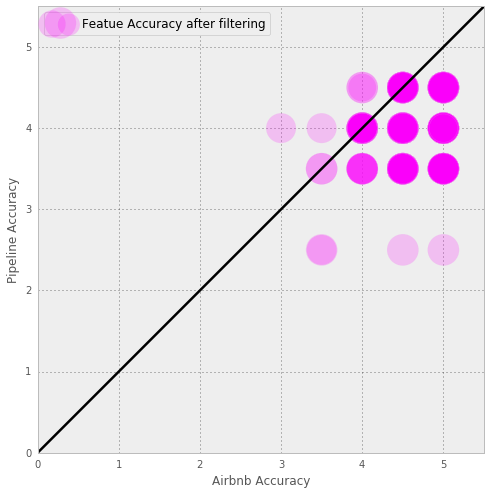

In [20]:
ax = new_comparison1.plot(kind='scatter', x='AirbnbAccuracy', y='PipeAccuracy', 
color='Fuchsia',label='Featue Accuracy after filtering',
                          s=comparison['AirbnbAccuracy']*200,alpha=0.2, figsize=(8,8))
line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Accuracy')
plt.xlabel('Airbnb Accuracy')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

#  The same process is repeated for all the other features

## Feature: Check-in

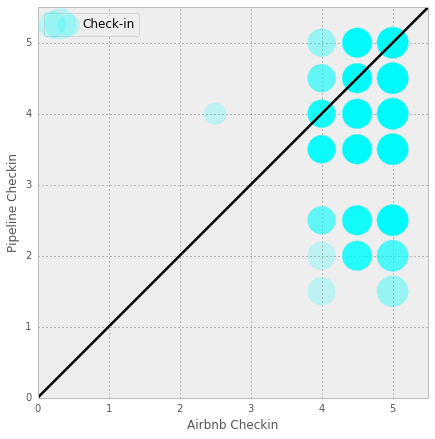

In [22]:
dx = comparison.plot(kind='scatter', x='AirbnbCheck-in', y='PipeCheckin',
color='Aqua',label='Check-in',s=comparison['AirbnbCheck-in']*200,alpha=0.2,
                     figsize=(7,7)).set_xlim(0,7)

line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Checkin')
plt.xlabel('Airbnb Checkin')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

In [23]:
# For filling the dataframe
i=5.0
s0=comparison[comparison['AirbnbCheck-in']==i]
s00=s0['PipeCheckin'].value_counts()
b=pd.DataFrame({'Airbnb':i, 'Pipeline':s00.index,
                'V_Frequency': s00.values})
i=4.5
s1=comparison[comparison['AirbnbCheck-in']==i]
s11=s1['PipeCheckin'].value_counts()
b1=pd.DataFrame({'Airbnb':i, 'Pipeline':s11.index,
                 'V_Frequency': s11.values})
i=4.0
s2=comparison[comparison['AirbnbCheck-in']==i]
s22=s2['PipeCheckin'].value_counts()
b2=pd.DataFrame({'Airbnb':i, 'Pipeline':s22.index,
                 'V_Frequency': s22.values})
i=3.5
s3=comparison[comparison['AirbnbCheck-in']==i]
s33=s3['PipeCheckin'].value_counts()
b3=pd.DataFrame({'Airbnb':i, 'Pipeline':s33.index, 
                 'V_Frequency': s33.values})
i=3.0
s4=comparison[comparison['AirbnbCheck-in']==i]
s44=s4['PipeCheckin'].value_counts()
b4=pd.DataFrame({'Airbnb':i, 'Pipeline':s44.index, 
                 'V_Frequency': s44.values})
stars_compared=pd.concat([b,b1,b2,b3,b4],ignore_index=True)
stars_compared['Percentage']=
((stars_compared['V_Frequency']/stars_compared['V_Frequency'].sum())*100)
stars_compared.columns=['Airbnb','Pipeline','Frequency','Percentage']
stars_compared

,Airbnb,Pipeline,Frequency,Percentage
0,5.0,4.0,515,36.79
1,5.0,4.5,228,16.29
2,5.0,3.5,166,11.86
3,5.0,5.0,62,4.43
4,5.0,2.5,18,1.29
5,5.0,2.0,5,0.36
6,5.0,1.5,2,0.14
7,4.5,4.0,176,12.57
8,4.5,3.5,97,6.93
9,4.5,4.5,60,4.29


In [24]:
ot=stars_compared[stars_compared['Percentage']<4]
other=ot['Percentage'].sum()
other
freq=ot['Frequency'].sum()
main=stars_compared[stars_compared['Percentage']>=4]
main.loc[26]=['Other','Other',freq,other]
main

c:\python27\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Airbnb,Pipeline,Frequency,Percentage
0,5,4,515,36.79
1,5,4.5,228,16.29
2,5,3.5,166,11.86
3,5,5,62,4.43
7,4.5,4,176,12.57
8,4.5,3.5,97,6.93
9,4.5,4.5,60,4.29
26,Other,Other,96,6.86


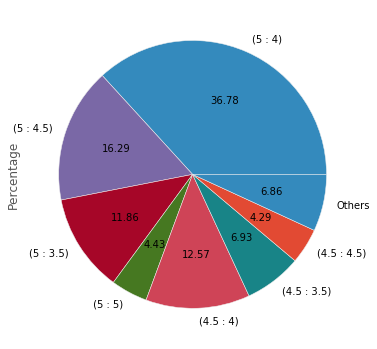

In [25]:
main['Percentage'].plot(kind='pie', labels=['(5 : 4)', '(5 : 4.5)', 
'(5 : 3.5)', ' (5 : 5)','(4.5 : 4)', '(4.5 : 3.5)', '(4.5 : 4.5)' ,'Others'],
                        autopct='%.2f', fontsize=10, figsize=(6, 6))

In [26]:
comparison['DiffCheckin']=comparison['AirbnbCheck-in']-comparison['PipeCheckin']
dfr=comparison['DiffCheckin'].value_counts()
norm= comparison['DiffCheckin'].value_counts(normalize=True)
dfrf=dfr.to_frame()
dfrf['Normalized']=norm
dfrf.columns=['Frequency','Normalized']
dfrf

,Frequency,Normalized
1.0,612,0.436831
0.5,417,0.297645
1.5,170,0.121342
0.0,132,0.094218
2.5,27,0.019272
-0.5,21,0.014989
2.0,12,0.008565
3.0,5,0.003569
-1.0,2,0.001428
3.5,2,0.001428


In [27]:
bg1=comparison[comparison['DiffCheckin']>1.5]
ls1=comparison[comparison['DiffCheckin']<-1.5]
weird=pd.concat([bg1,ls1])
weird_listing=weird['Id']
weird[['Id','AirbnbCheck-in','PipeCheckin']]

,Id,AirbnbCheck-in,PipeCheckin
32,2047376,5.0,2.5
195,2218464,5.0,1.5
257,2304806,4.5,2.5
288,2343032,4.5,2.0
397,2470214,5.0,2.5
399,2470646,4.5,2.0
403,2476882,5.0,2.5
450,2519425,4.5,2.5
455,2529643,5.0,1.5
465,2534324,4.5,2.5


In [28]:
acy=full_content[full_content['Listing ID']== 2529643]
acy[acy['Feature: Check-in']!=0]

,Listing ID,Review ID,Sentence,Sentiment score,Feature: Check-in
65492,2529643,12012600,"Notably our arrival, we had a delay in the pla...",-0.55737,-0.55737


In [29]:
acy=full_content[full_content['Listing ID']== 2218464]
acy[acy['Feature: Check-in']!=0]

,Listing ID,Review ID,Sentence,Sentiment score,Feature: Check-in
27433,2218464,51685180,The host canceled this reservation 187 days be...,-0.624893,-0.624893


In [30]:
a=full_content[['Listing ID','Review ID','Feature: Check-in']]
ap=a[a['Feature: Check-in']!=0]
a_nodup=ap.drop_duplicates()
count=a_nodup.groupby('Listing ID').count()
count['Listing ID']=count.index
d = count[count['Review ID']<3]
less_3 = d[['Listing ID']]

# Drop from the dataframe these cases
mutual=comparison[comparison['Id'].isin(less_3['Listing ID'])]
indexes_ID=mutual.index
for i in less_3['Listing ID']:
    new_comparison2=comparison.drop(indexes_ID)

In [31]:
new_comparison2['DifferenceCheckin']=
new_comparison2['AirbnbCheck-in']-new_comparison2['PipeCheckin']
dfr_new=new_comparison2['DifferenceCheckin'].value_counts()
norm_new = new_comparison2['DifferenceCheckin'].value_counts(normalize=True)
dfrf_new=dfr_new.to_frame()
dfrf_new['Normalized']=norm_new
dfrf_new.columns=['New_Frequency','New_Normalized']
dfrf_new

,New_Frequency,New_Normalized
1.0,313,0.515651
0.5,208,0.342669
1.5,55,0.090610
0.0,22,0.036244
2.0,3,0.004942
-0.5,3,0.004942
2.5,3,0.004942


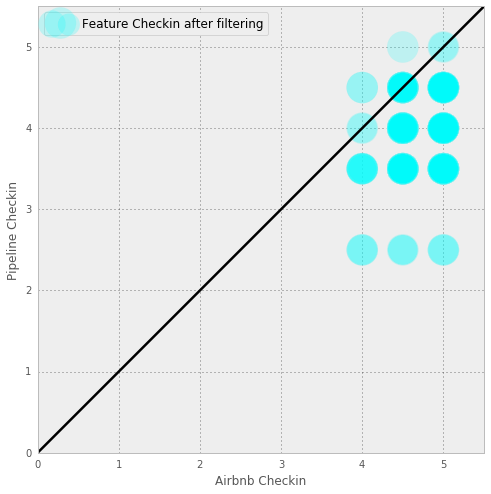

In [32]:
ax = new_comparison2.plot(kind='scatter', x='AirbnbCheck-in', y='PipeCheckin',
 color='Aqua', label='Feature Checkin after filtering', 
                          s=comparison['AirbnbCheck-in']*200,alpha=0.2, figsize=(8,8))

line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Checkin')
plt.xlabel('Airbnb Checkin')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

## Feature: Cleanliness

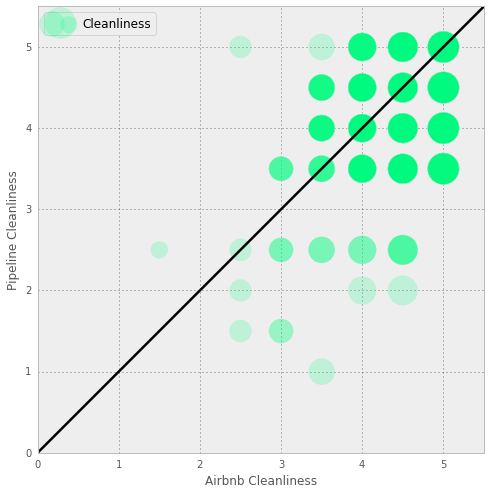

In [33]:
ax = comparison.plot(kind='scatter', x='AirbnbCleanliness', y='PipeCleanliness',
color='SpringGreen',label='Cleanliness', 
                     s=comparison['AirbnbCleanliness']*200,alpha=0.2, figsize=(8,8))

line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Cleanliness')
plt.xlabel('Airbnb Cleanliness')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

In [34]:
# For filling the dataframe
i=5.0
s0=comparison[comparison['AirbnbCleanliness']==i]
s00=s0['PipeCleanliness'].value_counts()
b=pd.DataFrame({'Airbnb':i, 'Pipeline':s00.index,
                'V_Frequency': s00.values})
i=4.5
s1=comparison[comparison['AirbnbCleanliness']==i]
s11=s1['PipeCleanliness'].value_counts()
b1=pd.DataFrame({'Airbnb':i, 'Pipeline':s11.index,
                 'V_Frequency': s11.values})
i=4.0
s2=comparison[comparison['AirbnbCleanliness']==i]
s22=s2['PipeCleanliness'].value_counts()
b2=pd.DataFrame({'Airbnb':i, 'Pipeline':s22.index, 
                 'V_Frequency': s22.values})
i=3.5
s3=comparison[comparison['AirbnbCleanliness']==i]
s33=s3['PipeCleanliness'].value_counts()
b3=pd.DataFrame({'Airbnb':i, 'Pipeline':s33.index,
                 'V_Frequency': s33.values})
i=3.0
s4=comparison[comparison['AirbnbCleanliness']==i]
s44=s4['PipeCleanliness'].value_counts()
b4=pd.DataFrame({'Airbnb':i, 'Pipeline':s44.index, 
                 'V_Frequency': s44.values})
i=2.5
s5=comparison[comparison['AirbnbCleanliness']==i]
s55=s5['PipeCleanliness'].value_counts()
b5=pd.DataFrame({'Airbnb':i, 'Pipeline':s55.index, 
                 'V_Frequency': s55.values})
i=1.5
s6=comparison[comparison['AirbnbCleanliness']==i]
s66=s6['PipeCleanliness'].value_counts()
b6=pd.DataFrame({'Airbnb':i, 'Pipeline':s66.index, 
                 'V_Frequency': s66.values})

stars_compared=pd.concat([b,b1,b2,b3,b4,b5,b6],ignore_index=True)
stars_compared['Percentage']=
((stars_compared['V_Frequency']/stars_compared['V_Frequency'].sum())*100).round(2)
stars_compared.columns=['Airbnb','Pipeline','Frequency','Percentage']
stars_compared

,Airbnb,Pipeline,Frequency,Percentage
0,5.0,4.5,540,30.32
1,5.0,4.0,259,14.54
2,5.0,5.0,67,3.76
3,5.0,3.5,17,0.95
4,4.5,4.5,330,18.53
5,4.5,4.0,275,15.44
6,4.5,5.0,45,2.53
7,4.5,3.5,23,1.29
8,4.5,2.5,5,0.28
9,4.5,2.0,1,0.06


In [35]:
ot=stars_compared[stars_compared['Percentage']<4]
other=ot['Percentage'].sum()
other
freq=ot['Frequency'].sum()
main=stars_compared[stars_compared['Percentage']>=4]
main.loc[26]=['Other','Other',freq,other]
main

c:\python27\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Airbnb,Pipeline,Frequency,Percentage
0,5,4.5,540,30.32
1,5,4,259,14.54
4,4.5,4.5,330,18.53
5,4.5,4,275,15.44
10,4,4,81,4.55
26,Other,Other,296,16.65


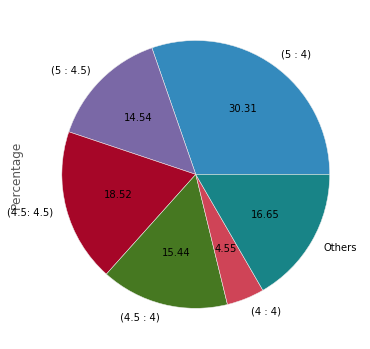

In [36]:
main['Percentage'].plot(kind='pie', labels=['(5 : 4)', '(5 : 4.5)', '(4.5: 4.5)',
  ' (4.5 : 4)', '(4 : 4)','Others'], autopct='%.2f', fontsize=10, figsize=(6, 6))

In [37]:
comparison['DiffCleanliness']=comparison['AirbnbCleanliness']-comparison['PipeCleanliness']
dfr=comparison['DiffCleanliness'].value_counts()
norm= comparison['DiffCleanliness'].value_counts(normalize=True)
dfrf=dfr.to_frame()
dfrf['Normalized']=norm
dfrf.columns=['Frequency','Normalized']
dfrf

,Frequency,Normalized
0.5,839,0.471084
0.0,486,0.272880
1.0,286,0.160584
-0.5,111,0.062325
-1.0,27,0.015160
1.5,22,0.012353
2.0,6,0.003369
2.5,2,0.001123
-2.5,1,0.000561
-1.5,1,0.000561


In [38]:
bg1=comparison[comparison['DiffCleanliness']>1.5]
ls1=comparison[comparison['DiffCleanliness']<-1.5]
weird=pd.concat([bg1,ls1])
weird_listing=weird['Id']
weird[['Id','AirbnbCleanliness','PipeCleanliness']]

,Id,AirbnbCleanliness,PipeCleanliness
161,2174515,4.5,2.5
653,2722090,4.5,2.5
725,2796412,4.5,2.5
942,3003133,4.5,2.0
1482,3565067,4.5,2.5
1554,3641523,4.0,2.0
1692,3760214,4.5,2.5
1719,3786601,3.5,1.0
1820,3877186,2.5,5.0


In [39]:
acy=full_content[full_content['Listing ID']== 3877186]
acy[acy['Feature: Cleanliness']!=0]

,Listing ID,Review ID,Sentence,Sentiment score,Feature: Cleanliness
225688,3877186,29455957,"The room we stayed in, at the houses top floor...",0.659653,0.659653
225689,3877186,29455957,It is a student house very fun indeed but don'...,0.904146,0.904146


In [40]:
acy=full_content[full_content['Listing ID']==  3786601]
acy[acy['Feature: Cleanliness']!=0]

,Listing ID,Review ID,Sentence,Sentiment score,Feature: Cleanliness
217781,3786601,26333387,The apartment however was not that clean (for ...,-0.842533,-0.842533


In [41]:
a=full_content[['Listing ID','Review ID','Feature: Cleanliness']]
ap=a[a['Feature: Cleanliness']!=0]
a_nodup=ap.drop_duplicates()
count=a_nodup.groupby('Listing ID').count()
count['Listing ID']=count.index
d = count[count['Review ID']<3]
less_3 = d[['Listing ID']]

# Drop from the dataframe these cases
mutual=comparison[comparison['Id'].isin(less_3['Listing ID'])]
indexes_ID=mutual.index
for i in less_3['Listing ID']:
    new_comparison3=comparison.drop(indexes_ID)

In [42]:
new_comparison3['DifferenceCleanliness']=
new_comparison3['AirbnbCleanliness']-new_comparison3['PipeCleanliness']

dfr_new=new_comparison3['DifferenceCleanliness'].value_counts()
norm_new = new_comparison3['DifferenceCleanliness'].value_counts(normalize=True)
dfrf_new=dfr_new.to_frame()
dfrf_new['Normalized']=norm_new
dfrf_new.columns=['New_Frequency','New_Normalized']
dfrf_new

,New_Frequency,New_Normalized
0.5,692,0.534363
0.0,348,0.268726
1.0,176,0.135907
-0.5,58,0.044788
-1.0,12,0.009266
1.5,7,0.005405
2.0,2,0.001544


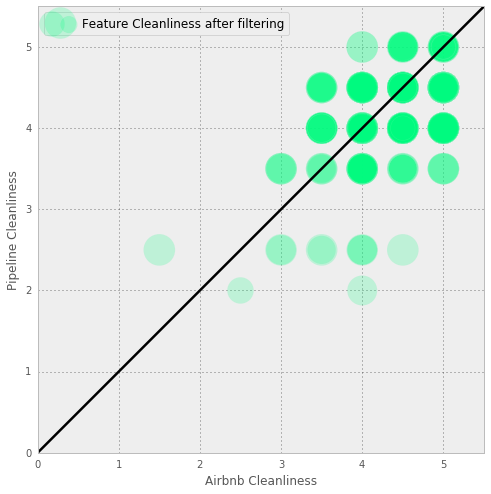

In [43]:
ax = new_comparison3.plot(kind='scatter', x='AirbnbCleanliness', y='PipeCleanliness',
color='SpringGreen',label='Feature Cleanliness after filtering',
                          s=comparison['AirbnbCleanliness']*200,alpha=0.2, figsize=(8,8))
line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Cleanliness')
plt.xlabel('Airbnb Cleanliness')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

## Feature: Value

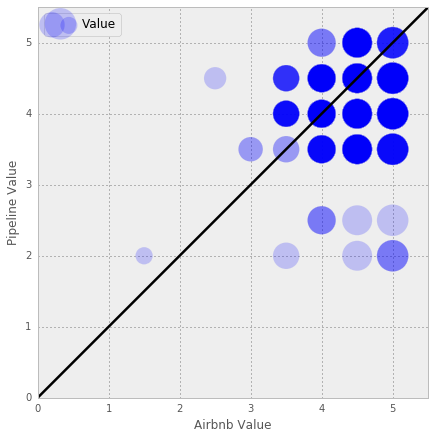

In [44]:
dx = comparison.plot(kind='scatter', x='AirbnbValue', y='PipeValue', 
color='Blue',label='Value', s=comparison['AirbnbValue']*200,alpha=0.2,
                     figsize=(7,7)).set_xlim(0,7)

line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Value')
plt.xlabel('Airbnb Value')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

In [45]:
a=full_content[['Listing ID','Review ID','Feature: Value']]
ap=a[a['Feature: Value']!=0]
a_nodup=ap.drop_duplicates()
count=a_nodup.groupby('Listing ID').count()
count['Listing ID']=count.index
d = count[count['Review ID']<3]
less_3 = d[['Listing ID']]

# Drop from the dataframe these cases
mutual=comparison[comparison['Id'].isin(less_3['Listing ID'])]
indexes_ID=mutual.index
for i in less_3['Listing ID']:
    new_comparison4=comparison.drop(indexes_ID)

new_comparison4['DifferenceValue']=
new_comparison4['AirbnbValue']-new_comparison4['PipeValue']

dfr_new=new_comparison4['DifferenceValue'].value_counts()
norm_new = new_comparison4['DifferenceValue'].value_counts(normalize=True)
dfrf_new=dfr_new.to_frame()
dfrf_new['Normalized']=norm_new
dfrf_new.columns=['New_Frequency','New_Normalized']
dfrf_new

,New_Frequency,New_Normalized
0.5,753,0.537090
0.0,384,0.273894
1.0,211,0.150499
-0.5,44,0.031384
1.5,6,0.004280
-1.0,3,0.002140
-2.0,1,0.000713


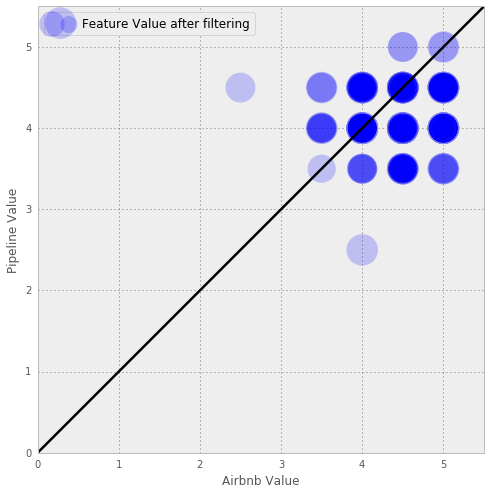

In [46]:
ax = new_comparison4.plot(kind='scatter', x='AirbnbValue', y='PipeValue',
color='Blue',label='Feature Value after filtering', 
              s=comparison['AirbnbValue']*200,alpha=0.2, figsize=(8,8))

line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Value')
plt.xlabel('Airbnb Value')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

## Feature Location

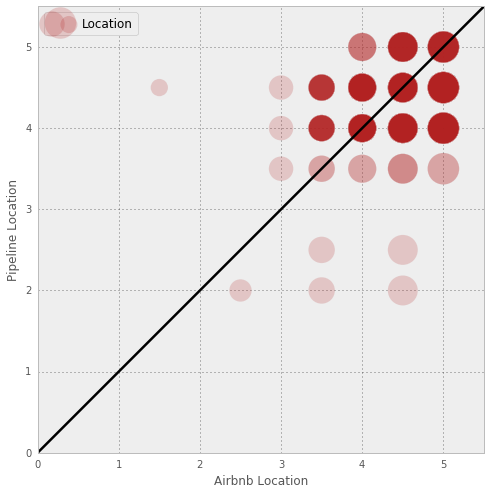

In [47]:
ax = comparison.plot(kind='scatter', x='AirbnbLocation', y='PipeLocation',
color='FireBrick', label='Location', s=comparison['AirbnbLocation']*200, 
                     alpha=0.2, figsize=(8,8))

line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Location')
plt.xlabel('Airbnb Location')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

In [48]:
a=full_content[['Listing ID','Review ID','Feature: Location']]
ap=a[a['Feature: Location']!=0]
a_nodup=ap.drop_duplicates()
count=a_nodup.groupby('Listing ID').count()
count['Listing ID']=count.index
d = count[count['Review ID']<3]
less_3 = d[['Listing ID']]

# Drop from the dataframe these cases
mutual=comparison[comparison['Id'].isin(less_3['Listing ID'])]
indexes_ID=mutual.index
for i in less_3['Listing ID']:
    new_comparison5=comparison.drop(indexes_ID)

new_comparison5['DifferenceLocation']=
new_comparison5['AirbnbLocation']-new_comparison5['PipeLocation']

dfr_new=new_comparison5['DifferenceLocation'].value_counts()
norm_new = new_comparison5['DifferenceLocation'].value_counts(normalize=True)
dfrf_new=dfr_new.to_frame()
dfrf_new['Normalized']=norm_new
dfrf_new.columns=['New_Frequency','New_Normalized']
dfrf_new

,New_Frequency,New_Normalized
0.5,960,0.512000
0.0,681,0.363200
1.0,121,0.064533
-0.5,103,0.054933
-1.0,9,0.004800
1.5,1,0.000533


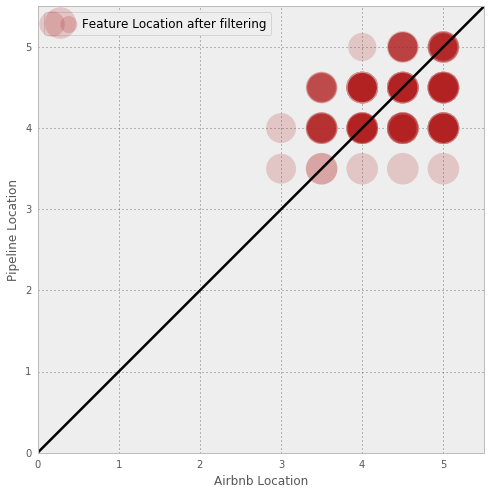

In [49]:
ax = new_comparison5.plot(kind='scatter', x='AirbnbLocation', y='PipeLocation', 
color='FireBrick',label='Feature Location after filtering',
        s=comparison['AirbnbLocation']*200,alpha=0.2, figsize=(8,8))

line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Location')
plt.xlabel('Airbnb Location')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

## Feature Communication

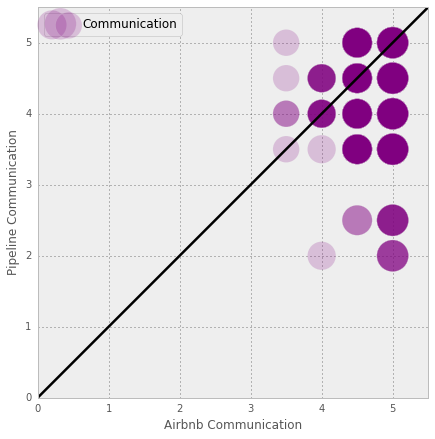

In [50]:
dx = comparison.plot(kind='scatter', x='AirbnbCommunication', y='PipeCommunication', 
 color='Purple',label='Communication', s=comparison['AirbnbCommunication']*200,
                     alpha=0.2, figsize=(7,7)).set_xlim(1,7)

line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.xlabel('Airbnb Communication')
plt.ylabel('Pipeline Communication')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

In [51]:
a=full_content[['Listing ID','Review ID','Feature: Communication']]
ap=a[a['Feature: Communication']!=0]
a_nodup=ap.drop_duplicates()
count=a_nodup.groupby('Listing ID').count()
count['Listing ID']=count.index
d = count[count['Review ID']<3]
less_3 = d[['Listing ID']]

# Drop from the dataframe these cases
mutual=comparison[comparison['Id'].isin(less_3['Listing ID'])]
indexes_ID=mutual.index
for i in less_3['Listing ID']:
    new_comparison6=comparison.drop(indexes_ID)

new_comparison6['DifferenceCommunication']=
new_comparison6['AirbnbCommunication']-new_comparison6['PipeCommunication']

dfr_new=new_comparison6['DifferenceCommunication'].value_counts()
norm_new = new_comparison6['DifferenceCommunication'].value_counts(normalize=True)
dfrf_new=dfr_new.to_frame()
dfrf_new['Normalized']=norm_new
dfrf_new.columns=['New_Frequency','New_Normalized']
dfrf_new

,New_Frequency,New_Normalized
0.5,683,0.535266
1.0,406,0.318182
0.0,152,0.119122
1.5,24,0.018809
-0.5,10,0.007837
2.5,1,0.000784


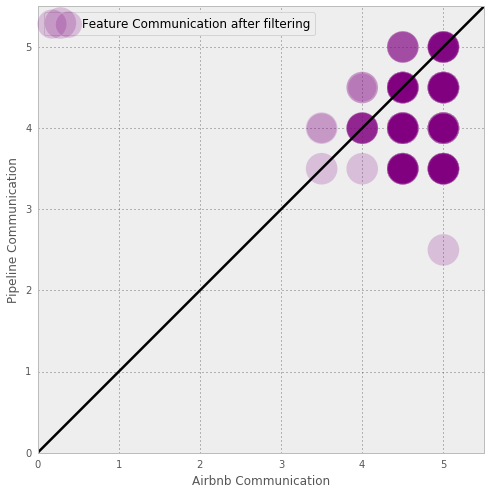

In [52]:
ax = new_comparison6.plot(kind='scatter', x='AirbnbCommunication', y='PipeCommunication',
color='Purple',label='Feature Communication after filtering',
                          s=comparison['AirbnbCommunication']*200,alpha=0.2, figsize=(8,8))
line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.ylabel('Pipeline Communication')
plt.xlabel('Airbnb Communication')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

# Visualization of combinations for all features after filtering them all
Here the combinations of stars of features given by the pipeline and compared once again with the values of Airbnb, but this time we compare the filtered set. So, all the listings which do not have enough reviews to generate a star per feature are exculded from the certain feature. We see that the combinations are much more concentrated now.

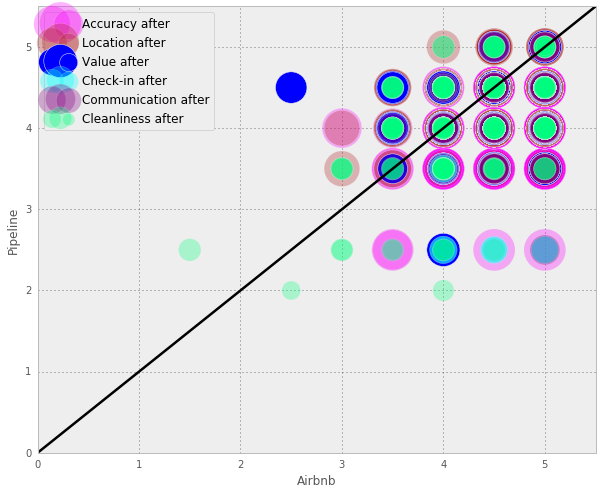

In [53]:
ax = new_comparison1.plot(kind='scatter', x='AirbnbAccuracy', y='PipeAccuracy', 
color='Fuchsia', label='Accuracy after',alpha=0.3, s=comparison['AirbnbAccuracy']*350)

bx = new_comparison5.plot(kind='scatter', x='AirbnbLocation', y='PipeLocation', 
color='FireBrick', label='Location after', ax=ax,alpha=0.3, s=comparison['AirbnbLocation']*280)

cx = new_comparison4.plot(kind='scatter', x='AirbnbValue', y='PipeValue', color='Blue', 
                          label='Value after', ax=bx,  s=comparison['AirbnbValue']*220)

dx = new_comparison2.plot(kind='scatter', x='AirbnbCheck-in', y='PipeCheckin', color='Aqua', 
 label='Check-in after', alpha=0.3, ax=cx,  s=comparison['AirbnbCheck-in']*150)

ex = new_comparison6.plot(kind='scatter', x='AirbnbCommunication', y='PipeCommunication', 
color='Purple', alpha=0.3, label='Communication after', ax=dx,  s=comparison['AirbnbCommunication']*180)

fx = new_comparison3.plot(kind='scatter', x='AirbnbCleanliness', y='PipeCleanliness',
 color='SpringGreen',label='Cleanliness after', ax=ex,  s=comparison['AirbnbCleanliness']*100, 
                          alpha=0.3, figsize=(10,8)).set_xlim(0,8)

line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.xlabel('Airbnb')
plt.ylabel('Pipeline')
plt.setp(line, color='Black', linewidth=2.5)
plt.show()

# SOME STATISTICS

## Calculate the Root Mean Squared Error (RMSE) in star difference before and after the filtering 
The table and the plot shows how the RMSE changed after conditioning the number of reviews to 3 per each feature

In [54]:
SSD1=(comparison['AirbnbAccuracy']-comparison['PipeAccuracy']).pow(2).sum()
MSE_Accuracy=SSD1/new_comparison1['DifferenceAccuracy'].count()

SSD2=(comparison['AirbnbCheck-in']-comparison['PipeCheckin']).pow(2).sum()
MSE_Checkin=SSD2/new_comparison2['DifferenceCheckin'].count()

SSD3=(comparison['AirbnbCleanliness']-comparison['PipeCleanliness']).pow(2).sum()
MSE_Cleanliness=SSD3/new_comparison3['DifferenceCleanliness'].count()

SSD4=(comparison['AirbnbValue']-comparison['PipeValue']).pow(2).sum()
MSE_Value=SSD4/new_comparison4['DifferenceValue'].count()

SSD5=(comparison['AirbnbLocation']-comparison['PipeLocation']).pow(2).sum()
MSE_Location=SSD5/new_comparison5['DifferenceLocation'].count()

SSD6=(comparison['AirbnbValue']-comparison['PipeValue']).pow(2).sum()
MSE_Communication=SSD6/new_comparison6['DifferenceCommunication'].count()

values=[MSE_Accuracy, MSE_Checkin,MSE_Cleanliness,MSE_Value, MSE_Location, MSE_Communication]
mse=pd.DataFrame(data=values, index=['Accuracy','Checkin',
                  'Cleanliness','Value','Location','Communication'])
mse.columns=['MSE']

In [55]:
SSD1=new_comparison1['DifferenceAccuracy'].pow(2).sum()
MSE_Accuracy=SSD1/new_comparison1['DifferenceAccuracy'].count()

SSD2=new_comparison2['DifferenceCheckin'].pow(2).sum()
MSE_Checkin=SSD2/new_comparison2['DifferenceCheckin'].count()

SSD3=new_comparison3['DifferenceCleanliness'].pow(2).sum()
MSE_Cleanliness=SSD3/new_comparison3['DifferenceCleanliness'].count()

SSD4=new_comparison4['DifferenceValue'].pow(2).sum()
MSE_Value=SSD4/new_comparison4['DifferenceValue'].count()

SSD5=new_comparison5['DifferenceLocation'].pow(2).sum()
MSE_Location=SSD5/new_comparison5['DifferenceLocation'].count()

SSD6=new_comparison6['DifferenceCommunication'].pow(2).sum()
MSE_Communication=SSD6/new_comparison6['DifferenceCommunication'].count()

values=[MSE_Accuracy, MSE_Checkin,MSE_Cleanliness,MSE_Value,
        MSE_Location, MSE_Communication]
mse_re=pd.DataFrame(data=np.sqrt(values), index=['Accuracy',
      'Checkin','Cleanliness','Value','Location','Communication'])

mse_re['MSE']=np.sqrt(mse['MSE'])
mse_re.columns=['RMSE_After','RMSE']
mse_re['# in RMSE']=mse_re['RMSE_After'] - mse_re['RMSE']
mse_re

,RMSE_After,RMSE,# in RMSE
Accuracy,0.801127,1.184486,-0.383359
Checkin,0.925788,1.515706,-0.589917
Cleanliness,0.555249,0.705740,-0.150492
Value,0.554292,0.678538,-0.124246
Location,0.460724,0.487032,-0.026308
Communication,0.707938,0.711251,-0.003313


## Visualization of RMSE and how it changed

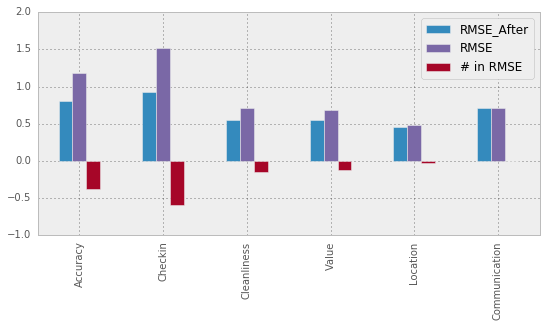

In [56]:
mse_re.plot(kind='bar',figsize=(9,4))

# OCCURRENCE AND CO-OCCURRENCE OF FEATURES

In [57]:
f1=new_comparison1[['Id','DifferenceAccuracy']]
f2=new_comparison2[['Id','DifferenceCheckin']]
f3=new_comparison3[['Id','DifferenceCleanliness']]
f4=new_comparison4[['Id','DifferenceValue']]
f5=new_comparison5[['Id','DifferenceLocation']]
f6=new_comparison6[['Id','DifferenceCommunication']]
m1=pd.merge(f1, f2, how='outer', on='Id')
m2=pd.merge(m1, f3, how='outer', on='Id')
m3=pd.merge(m2, f4, how='outer', on='Id')
m4=pd.merge(m3, f5, how='outer', on='Id')
all_diff=pd.merge(m4, f6, how='outer', on='Id')

## Number of listings where at least one feature is mentioned in more than 3 reviews
In **83.4%** of listings we will find features mentioned more than 3 times

In [58]:
total=full_content['Listing ID'].drop_duplicates().count()
n_listings=all_diff['Id'].count()
print n_listings
print ((n_listings/total)*100).round(1),'%'

1950
83.5 %


## Number of listing where NONE of these 6 features is mentioned
In **16.5%** of the listings none of the features is mentioned in more than 3 reviews. This makes these listings to be excluded from the analysis of feature scores, as they wouldn't be reliable.

In [59]:
no_feature=total-n_listings
print no_feature
print ((no_feature/total)*100).round(1),'%'

384
16.5 %


## Find listing where ALL features are mentioned in more than 3 reviews
There are 473 listing that all the features are mentioned in more than 3 reviews. So, in other words in **24.3%** of the listings we can calculate the sentiment scores of the features mentioned in them.

In [60]:
listings_with_all_features = all_diff.dropna(axis=0, how='any')
n_all= listings_with_all_features['Id'].count()
print 'Number of listings with all features with +3 reviews: ', n_all
print ((n_all/1950)*100).round(2)

Number of listings with all features with more than 3 reviews:  473
Compared to the overall number of listings:  24.26


## Number of listing with more than 3 reviews per feature
The table shows per each feature how many listings have more than three reviews. So for example we see that for feature **location** we can calculate its value in **96.15%** of the cases (so almost always). Howevwe, that will not be the case for feature **check-in** as its value will be calculated in less than a half of the listings, so in only **31.13%**

In [61]:
a=all_diff.count()
b=a.to_frame()
b.columns=['Number']
b['Percentage']=((b['Number']/1950)*100).round(2)
b

,Number,Percentage
Id,1950,100.00
DifferenceAccuracy,848,43.49
DifferenceCheckin,607,31.13
DifferenceCleanliness,1295,66.41
DifferenceValue,1402,71.90
DifferenceLocation,1875,96.15
DifferenceCommunication,1276,65.44
